In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from statsmodels.tsa import stattools

/home/aspiring1/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
!ls ..

Chapter_1			 WDIFootNote.csv
Chapter_2			 WDISeries-Time.csv
DJIA_Jan2016_Dec2016.xlsx	 WDISeries.csv
Monthly_CO2_Concentrations.xlsx  WDI_csv.zip
WDICountry-Series.csv		 chemical-concentration-readings.csv
WDICountry.csv			 inflation-consumer-prices-annual.xlsx
WDIData.csv			 mean-daily-temperature-fisher-river.csv


In [3]:
temp_mean = pd.read_csv('../mean-daily-temperature-fisher-river.csv')

In [4]:
temp_mean['Month_Year'] = temp_mean['Date'].apply(lambda m: pd.to_datetime(m, format = '%Y-%m-%d').strftime('%Y-%m'))

In [5]:
temp_mean.head(10)

,Date,Mean temparature,Month_Year
0,1988-01-01,-23.00,1988-01
1,1988-01-02,-20.50,1988-01
2,1988-01-03,-22.00,1988-01
3,1988-01-04,-30.50,1988-01
4,1988-01-05,-31.00,1988-01
5,1988-01-06,-27.50,1988-01
6,1988-01-07,-26.25,1988-01
7,1988-01-08,-26.50,1988-01
8,1988-01-09,-23.00,1988-01
9,1988-01-10,-23.50,1988-01


In [6]:
temp_mean.head()

,Date,Mean temparature,Month_Year
0,1988-01-01,-23.0,1988-01
1,1988-01-02,-20.5,1988-01
2,1988-01-03,-22.0,1988-01
3,1988-01-04,-30.5,1988-01
4,1988-01-05,-31.0,1988-01


In [7]:
monthly_stats = temp_mean.groupby(by='Month_Year')['Mean temparature'].agg([np.mean, np.median, np.std])

In [8]:
monthly_stats.head(10)

,mean,median,std
Month_Year,,,
1988-01,-22.137097,-23.000,5.260640
1988-02,-19.025862,-19.500,8.598522
1988-03,-8.258065,-9.250,5.341459
1988-04,2.641667,1.875,5.057720
1988-05,11.290323,11.000,6.254364
1988-06,19.291667,19.000,3.909032
1988-07,19.048387,18.500,3.073692
1988-08,17.379032,18.000,3.183205
1988-09,10.675000,10.750,3.880294


In [9]:
monthly_stats['Month'] = monthly_stats.index.map(lambda d: pd.to_datetime(d, format = '%Y-%m').strftime('%m'))
monthly_stats['Year'] = monthly_stats.index.map(lambda d: pd.to_datetime(d, format = '%Y-%m').strftime('%Y'))

In [10]:
monthly_stats.head(10)

,mean,median,std,Month,Year
Month_Year,,,,,
1988-01,-22.137097,-23.000,5.260640,01,1988
1988-02,-19.025862,-19.500,8.598522,02,1988
1988-03,-8.258065,-9.250,5.341459,03,1988
1988-04,2.641667,1.875,5.057720,04,1988
1988-05,11.290323,11.000,6.254364,05,1988
1988-06,19.291667,19.000,3.909032,06,1988
1988-07,19.048387,18.500,3.073692,07,1988
1988-08,17.379032,18.000,3.183205,08,1988
1988-09,10.675000,10.750,3.880294,09,1988


In [11]:
monthly_stats.sort_values(by=['Year', 'Month'], inplace = True)

In [12]:
monthly_stats.head(10)

,mean,median,std,Month,Year
Month_Year,,,,,
1988-01,-22.137097,-23.000,5.260640,01,1988
1988-02,-19.025862,-19.500,8.598522,02,1988
1988-03,-8.258065,-9.250,5.341459,03,1988
1988-04,2.641667,1.875,5.057720,04,1988
1988-05,11.290323,11.000,6.254364,05,1988
1988-06,19.291667,19.000,3.909032,06,1988
1988-07,19.048387,18.500,3.073692,07,1988
1988-08,17.379032,18.000,3.183205,08,1988
1988-09,10.675000,10.750,3.880294,09,1988


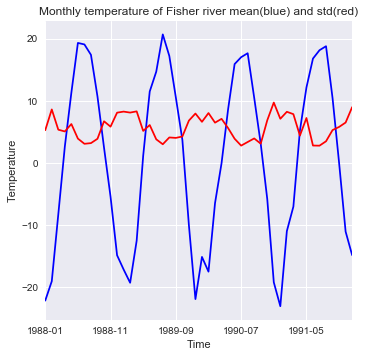

In [13]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(111)
monthly_stats['mean'].plot(ax = ax, color='b')
monthly_stats['std'].plot(ax = ax , color ='red')
ax.set_title('Monthly temperature of Fisher river mean(blue) and std(red)')
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

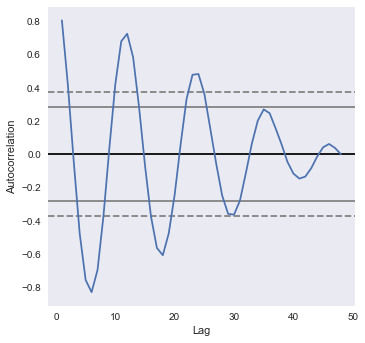

In [14]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(111)
autocorrelation_plot(monthly_stats['mean'], ax = ax)

### Seasonal Differences

In [15]:
monthly_mean_temp = monthly_stats['mean']
seasonal_df = monthly_mean_temp.diff(12)

In [16]:
seasonal_df = seasonal_df.iloc[12:]

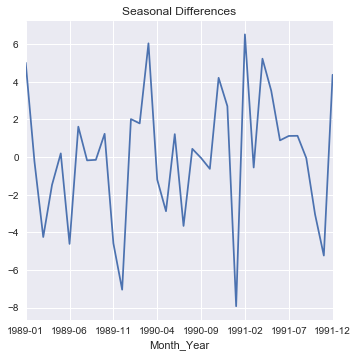

In [17]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(111)
ax.set_title('Seasonal Differences')
seasonal_df.plot(ax = ax)

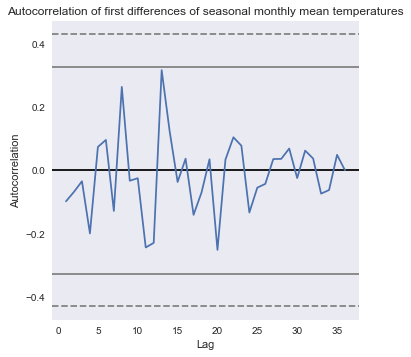

In [18]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Autocorrelation of first differences of seasonal monthly mean temperatures')
autocorrelation_plot(seasonal_df, ax = ax)

In [19]:
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp, unbiased = True, nlags = 10, qstat = True, alpha = 0.5)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean <= 0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


### Ljung Box test

In [20]:
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_df, unbiased = True, nlags = 10, qstat = True, alpha = 0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff <= 0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)
